In [1]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

from utils import buildNetwork, load_cifar

In [2]:
# Let's start a Session
sess = tf.Session()

In [3]:
batch_size = 1
HEIGHT = 32
WIDTH = 32
CHANNELS = 3
NUM_CLASSES = 10


In [4]:
data_path = "data/CIFAR-10/"

train_samples, train_labels, val_samples, val_labels = load_cifar(data_path)

In [5]:
# TODO add placeholder for inputs
inputs = tf.placeholder(tf.float32, [batch_size, HEIGHT, WIDTH, CHANNELS])
drop_rate = tf.placeholder(tf.float32)

logits = buildNetwork(inputs, batch_size, drop_rate)

xxxxxxxxxxxxxxx
(1, 32, 32, 3)
3
64
32
Linear Layer
(1, 1024)
Linear Layer
(1, 384)
Linear Layer
(1, 192)


## Task: Restore the previously stored checkpoint

In [9]:
# TODO restore the saved checkpoints ./checkpoints/model.ckpt
saver = tf.train.Saver()
#saver1 = tf.train.import_meta_graph('checkpoints/model.ckpt.meta')
#saver1.restore(sess, tf.train.latest_checkpoint('checkpoints/'))
saver.restore(sess, "checkpoints/model.ckpt")
print("done")

INFO:tensorflow:Restoring parameters from checkpoints/model.ckpt
done


## Task: Transform logits to probabilities

In [10]:
# TODO add an appropriate op to convert the logits into probabilities
init = tf.global_variables_initializer()
sess.run(init)
probabilities_op=(tf.nn.softmax(logits))

## Task:  Inference. Display results

Image 1
probability vector: 
[[ 0.1061993   0.09543648  0.0951324   0.10668988  0.10386048  0.10069075
   0.10371856  0.10101409  0.09363013  0.09362794]]
cat
Image 1
probability vector: 
[[ 0.10647473  0.09540506  0.09018406  0.11214302  0.10289612  0.09994832
   0.10568339  0.10178611  0.08894007  0.0965392 ]]
cat
Image 1
probability vector: 
[[ 0.10742451  0.09817503  0.09184163  0.11110289  0.10076328  0.09681112
   0.10426307  0.10192379  0.09157742  0.09611723]]
cat
Image 1
probability vector: 
[[ 0.10508765  0.09821159  0.09101098  0.11165879  0.10352228  0.09742419
   0.10473037  0.1032732   0.08935255  0.09572833]]
cat
Image 1
probability vector: 
[[ 0.1067845   0.09589935  0.09326029  0.10734928  0.10347674  0.10075161
   0.10264958  0.10255321  0.09373866  0.09353673]]
cat


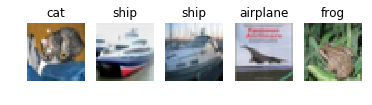

In [11]:
label_to_name = ['airplane', 'automobile', 'bird', 'cat', 'deer' , 'dog', 'frog', 'horse', 'ship', 'truck']

# TODO plot the first five *validation* images 
for ite in range(5):    
    plt.subplot(2, 5, ite+1)
    plt.title(label_to_name[val_labels[ite]])
    plt.imshow(val_samples[ite])
    plt.axis('off')

# TODO for each image, print the predicted class and the probability vector for all classes
for ite in range(5):
    input_val = val_samples[ite, :, :, :]
    input_val=input_val.reshape(1,32,32,3)
    #print (input_val.shape)
    #drop_rate 1 for testing
    feed_dict_val = {inputs:input_val, drop_rate:1}
    print("Image 1")
    print("probability vector: ")
    prob_vector=sess.run(probabilities_op, feed_dict_val)
    print(prob_vector)
    max=(np.argmax(prob_vector))
    print(label_to_name[max])
    